# Задача № 1

Используя данные о хоккеистах (скачать можно https://habr.com/ru/post/301340/),

проверьте, является ли среди хоккеистов из Финляндии, Норвегии и Дании значимым 
а) отличие роста.
b) BMI

В качестве ответа запишите 1, если является, и 0 иначе.

_Подсказка_: не забудьте предобработать данные (например, дублируются ли данные о конкретных игроках?).

In [3]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('C:\\hockey_players.csv')
df.head(10)

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694
5,2001,RUS,4,zhukov sergei,D,L,193,93.0,1975-11-23,lokomotiv yaroslavl,25.437372,1975,24.967113
6,2001,RUS,6,evstafiev andrei,D,L,176,84.0,1972-08-09,lokomotiv yaroslavl,28.725530,1972,27.117769
7,2001,RUS,7,krasotkin dmitri,D,L,183,91.0,1971-08-28,lokomotiv yaroslavl,29.675565,1971,27.173102
8,2001,RUS,13,razin andrei,F,L,180,85.0,1973-10-23,metallurg magnitogorsk,27.520876,1973,26.234568
9,2001,RUS,14,datsyuk pavel,F,L,178,86.0,1978-07-20,ak bars kazan,22.781656,1978,27.143037


In [8]:
df['country'].value_counts()

SWE    400
RUS    400
SVK    397
FIN    396
SUI    394
CZE    394
LAT    388
USA    388
CAN    388
GER    374
BLR    346
DEN    340
NOR    290
FRA    249
AUT    242
SLO    198
ITA    195
KAZ    175
UKR    169
JPN     96
HUN     50
POL     23
Name: country, dtype: int64

нам нужны FIN, NOR, DEN. Создаем 3 выборки

In [96]:
df_fin = df.loc[df['country'] == 'FIN', 'height']
df_nor = df.loc[df['country'] == 'NOR', 'height']
df_den = df.loc[df['country'] == 'DEN', 'height']
df_fin.head()

120    184
121    178
122    178
123    185
124    192
Name: height, dtype: int64

In [97]:
fin_mean = df_fin.mean()
nor_mean = df_nor.mean()
den_mean = df_den.mean()

fin_n = df_fin.shape[0]
nor_n = df_nor.shape[0]
den_n = df_den.shape[0]
fin_n, nor_n, den_n, fin_mean, nor_mean, den_mean

(396, 290, 340, 183.86868686868686, 182.94137931034481, 184.0)

объединим наши 3 датафрейма с помощью concat

In [98]:
all_df = pd.concat([df_fin, df_nor, df_den], ignore_index=True)
all_df

0       184
1       178
2       178
3       185
4       192
       ... 
1021    185
1022    180
1023    188
1024    186
1025    176
Name: height, Length: 1026, dtype: int64

In [100]:
all_mean = all_df.mean()
all_mean

183.65009746588694

Найдём значения  SSb  и  SSw :

In [102]:
SS_b = fin_n * (fin_mean - all_mean) ** 2 + nor_n * (nor_mean - all_mean) ** 2 + den_n * (den_mean - all_mean) ** 2

SS_w = ((df_fin - fin_mean) ** 2).sum() + ((df_nor - nor_mean) ** 2).sum() + ((df_den - den_mean) ** 2).sum()

SS_b, SS_w

(206.2098248058369, 24683.175165447577)

In [103]:
k = 3
n = fin_n + nor_n + den_n

k1 = k - 1
k2 = n - k

sigma2_b = SS_b / k1
sigma2_w = SS_w / k2

sigma2_b, sigma2_w

(103.10491240291844, 24.12822596817945)

In [104]:
F = sigma2_b / sigma2_w
F

4.273207343917213

In [36]:
from scipy import stats

In [105]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.0045220661840073

In [106]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

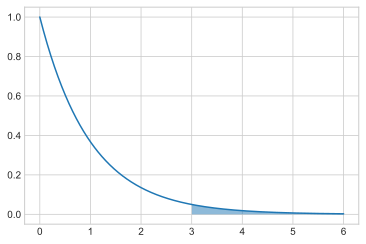

In [107]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

Значение статистики попало в критическую область, поэтому заключаем, что отличие роста является статистически значимым.

Также посчитаем и для BMI, сделаем всё тоже самое, что и для роста в предыдущем примере.

In [109]:
df_fin_bmi = df.loc[df['country'] == 'FIN', 'bmi']
df_nor_bmi = df.loc[df['country'] == 'NOR', 'bmi']
df_den_bmi = df.loc[df['country'] == 'DEN', 'bmi']

In [111]:
fin_mean = df_fin_bmi.mean()
nor_mean = df_nor_bmi.mean()
den_mean = df_den_bmi.mean()

fin_n = df_fin.shape[0]
nor_n = df_nor.shape[0]
den_n = df_den.shape[0]
fin_n, nor_n, den_n, fin_mean, nor_mean, den_mean

(396, 290, 340, 25.96327037123672, 25.961854727875714, 25.187289043708706)

In [112]:
all_df = pd.concat([df_fin_bmi, df_nor_bmi, df_den_bmi], ignore_index=True)
all_df

0       26.287807
1       26.196187
2       27.774271
3       25.420015
4       26.855469
          ...    
1021    26.296567
1022    26.543210
1023    22.634676
1024    23.702162
1025    24.212293
Name: bmi, Length: 1026, dtype: float64

In [113]:
all_mean = all_df.mean()
all_mean

25.705722429780348

Найдём значения SSb и SSw :

In [114]:
SS_b = fin_n * (fin_mean - all_mean) ** 2 + nor_n * (nor_mean - all_mean) ** 2 + den_n * (den_mean - all_mean) ** 2

SS_w = ((df_fin_bmi - fin_mean) ** 2).sum() + ((df_nor_bmi - nor_mean) ** 2).sum() + ((df_den_bmi - den_mean) ** 2).sum()

SS_b, SS_w

(136.67502155764123, 1938.7916470861858)

In [115]:
k = 3
n = fin_n + nor_n + den_n

k1 = k - 1
k2 = n - k

sigma2_b = SS_b / k1
sigma2_w = SS_w / k2

sigma2_b, sigma2_w

(68.33751077882062, 1.8952020010617652)

In [116]:
F = sigma2_b / sigma2_w
F

36.05816727743814

In [121]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.0045220661840073

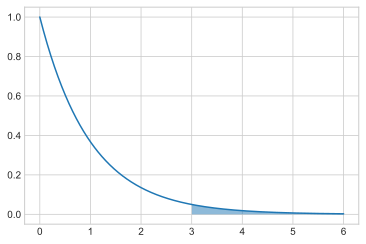

In [122]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

Наше значение статистики попадает в критическую область, поэтому заключаем, что отличие BMI является статистически значимым.